In [48]:
import keras
from keras.layers import Dense, Dropout, Conv2D, Flatten, Reshape, Activation, Input
from keras.models import Model
from keras.optimizers import RMSprop
from keras.backend import clear_session
from keras.initializers import RandomNormal

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
% matplotlib inline

import numpy as np

# Compositional Pattern Producing Neural Nets

Playing around with neural net initializations & rendering n shit

In [90]:
clear_session()
x_in = Input(shape=(4,))
beta = 25

def num_dense(in_layer, num, activation='tanh'):
    prev = 3
    amt_dense = np.random.uniform(low=64, high=1024)
    for x in range(num):
        num_neuron = prev
        print(num_neuron)
        init = RandomNormal(0, stddev=beta * 1/num_neuron)
        prev = amt_dense
        amt_dense = int(np.random.uniform(low=64, high=512))
        in_layer = Dense(amt_dense, 
                         activation=activation, kernel_initializer=init)(in_layer)
    return in_layer

x = num_dense(x_in, 9)
x_out = Dense(3, activation='sigmoid')(x)
model = Model(x_in, x_out)

3
406.4929737327292
177
72
507
494
323
93
137


(512, 512, 3)


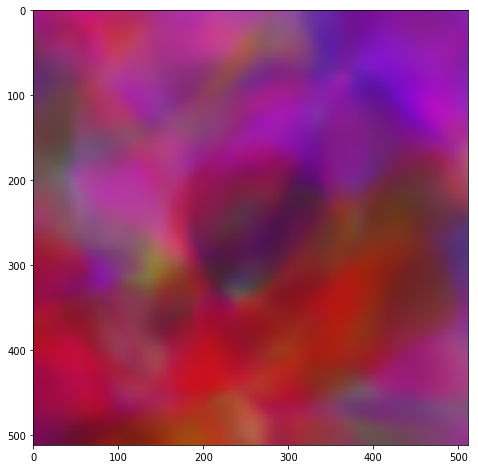

In [94]:
def do_img(model, tl=(0,0), br=(1,1), alpha=0.3, res=256):
    xs = np.linspace(start=tl[0], stop=br[0], num=res)
    ys = np.linspace(start=tl[1], stop=br[1], num=res)
    
    cols = []
    for x in xs:
        ext_x = x * np.ones((res))
        zs = np.sqrt(ext_x ** 2 + ys ** 2)
        alphas = alpha * np.ones((len(zs)))
        coords = np.stack([ext_x, ys, zs, alphas]).T
        cols.append(model.predict(coords))
    return np.array(cols)

tl = np.array([-1, -1])
br = np.array([1, 1])
scale = 20
tl = tl
br = br

img = do_img(model, tl=tl, br=br, res=512, alpha=1.4)
print(img.shape)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img, cmap='gray')

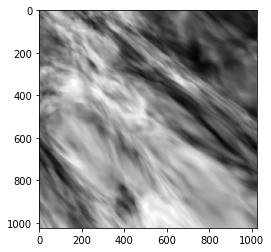

In [76]:
def gray(img):
    form = np.array([0.299, 0.587, 0.114])
    img = np.einsum('ijk,k->ij', img, form)
    return img
fig, ax = plt.subplots()
ax.imshow(gray(img), cmap='gray')

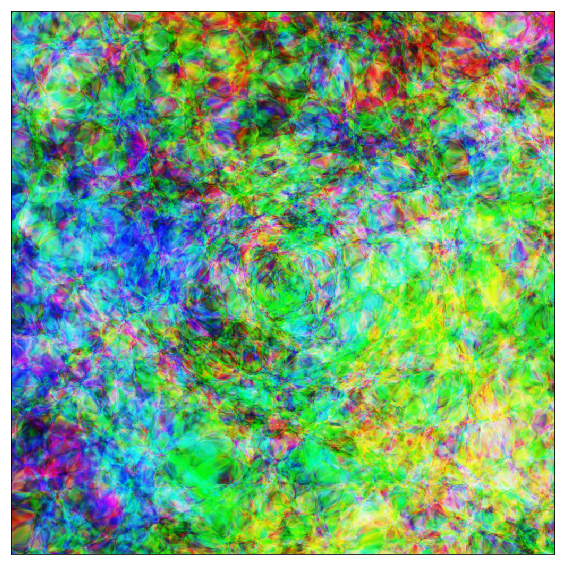

In [53]:
def animate(a_0, a_1, frame=[tl, br], num=50, res=512):
    alphas = np.linspace(a_0, a_1, num)
    fig, ax = plt.subplots(figsize=(10, 10))
    
    def update(i):
        img = do_img(model, tl=frame[0], br=frame[1], alpha=alphas[i], res=res)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img)
        return ax
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, num), interval=70)
    anim.save("art-long.gif", writer='imagemagick', dpi=100)
    fig.close()
    
animate(-1.5, 1.5, num=100, res=1024)